# Monte Carlo Simulation for FE
## IEOR 4703

### Simulation of Geometric Brownian Motion (GBM)

#### Exact vs. all discretization schemes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spot = 100
maturity = 1
sig = 0.55
r = 0.12
q = 0.0125

#monthly
m = 365
dt = maturity/m

In [3]:
S1 = np.zeros(m + 1)
S2 = np.zeros(m + 1)
S3 = np.zeros(m + 1)
S4 = np.zeros(m + 1)
t  = np.zeros(m + 1)
for i in range(m+1):
    t[i] = i*dt
#t = np.arange(0, maturity + dt, dt)

In [4]:
np.random.seed(2356734)

In [5]:
z = np.random.randn(m)

In [6]:
S1[0] = spot
S2[0] = spot
S3[0] = spot
S4[0] = spot
for i in range(m):

    # exact solution
    S1[i + 1] = S1[i] * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z[i])

    # Euler discretization
    S2[i + 1] = S2[i] + (r - q)*S2[i]*dt  + sig*S2[i]*np.sqrt(dt)*z[i]

    # Milstein scheme
    S3[i + 1] = S3[i] + (r - q)*S3[i]*dt  + sig*S3[i]*np.sqrt(dt)*z[i] + 0.5*sig*sig*S3[i]*dt*(z[i]**2 - 1)


    # Runge-Kutta
    s_tilde   = S4[i] + (r - q)*S4[i]*dt + sig*S4[i]*np.sqrt(dt)
    S4[i + 1] = S4[i] + (r - q)*S4[i]*dt + sig*S4[i]*np.sqrt(dt)*z[i] + 0.5*(sig*s_tilde - sig*S4[i])*(z[i]**2-1)*np.sqrt(dt)


In [7]:
# same as above but in vector form (faster)
# S[0] = spot
# S[1:] = np.exp((mu - sig*sig/2)*dt + sig*np.sqrt(dt)*z)
# S = np.cumprod(S)

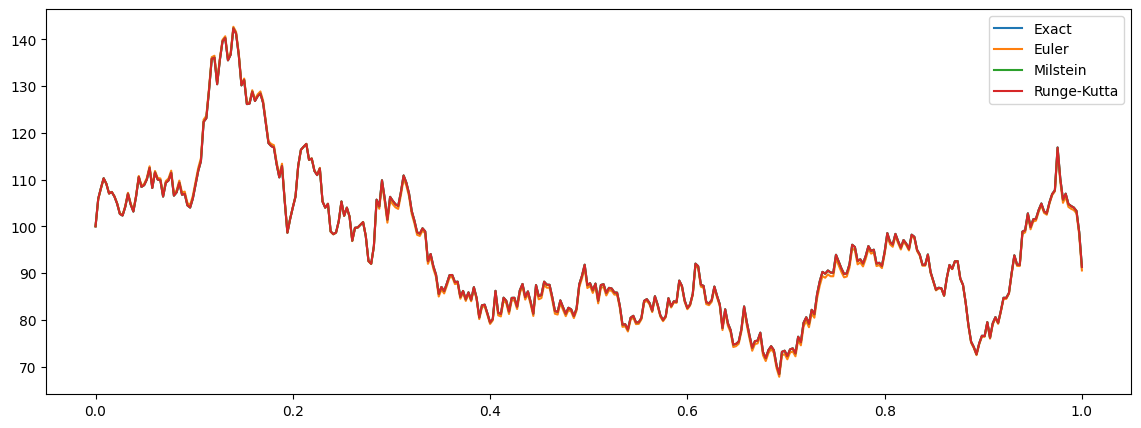

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(t, S1, label="Exact")
plt.plot(t, S2, label="Euler")
plt.plot(t, S3, label="Milstein")
plt.plot(t, S4, label="Runge-Kutta")
plt.legend(loc="best")
plt.show()